In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, cross_val_score


from sklearn.metrics import precision_score, recall_score,f1_score,accuracy_score
from sklearn.metrics import plot_roc_curve,confusion_matrix

In [2]:
#Reading data
df=pd.read_csv("../heart.csv")

In [3]:
#Creating Dummy variables
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [4]:
#Combining Dummy variables with dataframe
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [5]:
#Dropping original fields whose dummy variables were created
df = df.drop(columns = ['cp', 'thal', 'slope'])
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


# Model Training

In [6]:
# Splitting data into target feature and other features
x = df.drop("target", axis=1)
y = df["target"]

In [7]:
# Splitting data into training and testing sets
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [8]:
#Creating dictionaries to store accuracy and recall values
accuracy_values={}
recall_values={}
f1_values={}

## Logistic Regression

In [9]:
#Creating the logistic regression model
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)

C:\Users\anjan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [10]:
#Predicting/testing the Logistic Regression model
y_pred_logistic=logistic_model.predict(x_test)

In [11]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_logistic))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_logistic))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_logistic))

Accuracy score : 0.885
Recall score   : 0.844
F1 score       : 0.885


In [12]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Logistic_Regression"]=accuracy_score(y_test,y_pred_logistic)*100
recall_values["Logistic_Regression"]=recall_score(y_test,y_pred_logistic)*100
f1_values["Logistic_Regression"]=f1_score(y_test,y_pred_logistic)*100

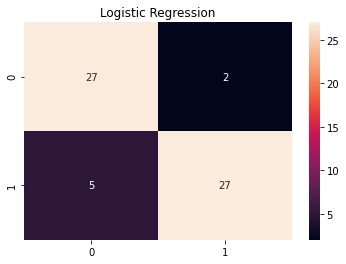

In [13]:
#Confusion matrix heatmap for Logistic regression
plt.title("Logistic Regression")
sns.heatmap(confusion_matrix(y_test,y_pred_logistic),annot=True)
plt.show()

In [14]:
# Logistic Regression
# True Positives: 27 
# True Negatives: 27
# Type 1 Error=> False Positive: 5 
# Type 2 Error=> False Negative: 2

## Random Forest Classifier

In [15]:
#Creating the Random Forest Classifier model
np.random.seed(42)
random_forest_model=RandomForestClassifier()
random_forest_model.fit(x_train,y_train)

RandomForestClassifier()

In [16]:
#Predicting/testing the Random Forest Classifier model
y_pred_rfc=random_forest_model.predict(x_test)

In [17]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_rfc))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_rfc))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_rfc))

Accuracy score : 0.869
Recall score   : 0.875
F1 score       : 0.875


In [18]:
#Adding the accuracy scores to the dictionaries
accuracy_values["Random Forest"]=accuracy_score(y_test,y_pred_rfc)*100
recall_values["Random Forest"]=recall_score(y_test,y_pred_rfc)*100
f1_values["Random Forest"]=f1_score(y_test,y_pred_rfc)*100

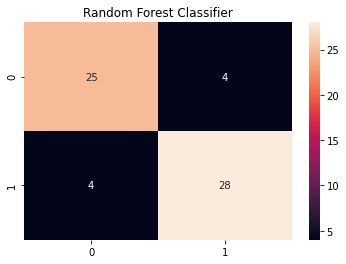

In [19]:
#Confusion matrix heatmap for Random Forest Classifier
plt.title("Random Forest Classifier")
sns.heatmap(confusion_matrix(y_test,y_pred_rfc),annot=True)
plt.show()

In [20]:
# Random Forest Classifier
# True Positives: 25 
# True Negatives: 28
# Type 1 Error=> False Positive: 4 
# Type 2 Error=> False Negative: 4

## KNN Classifier

In [21]:
#Creating the KNN Classifier model
np.random.seed(42)
knn_model=KNeighborsClassifier()
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
#Predicting/testing the KNN Classifier model
y_pred_knn=knn_model.predict(x_test)

In [23]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_knn))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_knn))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_knn))

Accuracy score : 0.689
Recall score   : 0.750
F1 score       : 0.716


In [24]:
#Adding the accuracy scores to the dictionaries
accuracy_values["KNN"]=accuracy_score(y_test,y_pred_knn)*100
recall_values["KNN"]=recall_score(y_test,y_pred_knn)*100
f1_values["KNN"]=f1_score(y_test,y_pred_knn)*100

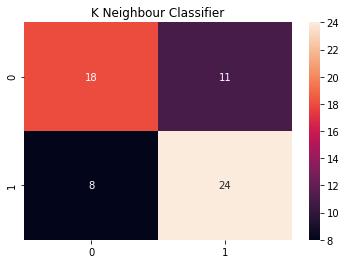

In [25]:
#Confusion matrix heatmap for K Neighbours Classifier
plt.title("K Neighbour Classifier")
sns.heatmap(confusion_matrix(y_test,y_pred_knn),annot=True)
plt.show()

In [26]:
# K Neighbours Classifier
# True Positives: 18
# True Negatives: 24
# Type 1 Error=> False Positive: 8 
# Type 2 Error=> False Negative: 11

## Support Vector Machine Classifier (SVM)

In [27]:
#Creating the SVM model
np.random.seed(42)
svm_model=svm.SVC(kernel="linear")
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
#Predicting/testing the SVM Classifier model
y_pred_svm=svm_model.predict(x_test)

In [29]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_svm))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_svm))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_svm))

Accuracy score : 0.852
Recall score   : 0.812
F1 score       : 0.852


In [30]:
#Adding the accuracy scores to the dictionaries
accuracy_values["SVM"]=accuracy_score(y_test,y_pred_svm)*100
recall_values["SVM"]=recall_score(y_test,y_pred_svm)*100
f1_values["SVM"]=f1_score(y_test,y_pred_svm)*100

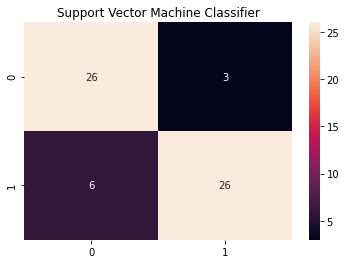

In [31]:
#Confusion matrix heatmap for SVM Classifier
plt.title("Support Vector Machine Classifier")
sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot=True)
plt.show()

In [32]:
# SVM Classifier
# True Positives: 26
# True Negatives: 26
# Type 1 Error=> False Positive: 6
# Type 2 Error=> False Negative: 3

## SVM with PCA

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components=3)
scaler = StandardScaler()

x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Text(0, 0.5, 'Second Principal Component')

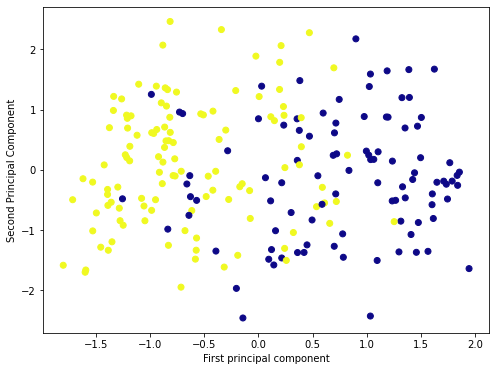

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [35]:
#Creating the SVM model after PCA
np.random.seed(42)
svmpca_model=svm.SVC()
svmpca_model.fit(x_train,y_train)

SVC()

In [36]:
#Predicting/testing the SVM Classifier model after PCA
y_pred_svmpca=svmpca_model.predict(x_test)

In [37]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_svmpca))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_svmpca))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_svmpca))

Accuracy score : 0.868
Recall score   : 0.820
F1 score       : 0.872


In [38]:
#Adding the accuracy scores to the dictionaries
accuracy_values["SVM with PCA"]=accuracy_score(y_test,y_pred_svmpca)*100
recall_values["SVM with PCA"]=recall_score(y_test,y_pred_svmpca)*100
f1_values["SVM with PCA"]=f1_score(y_test,y_pred_svmpca)*100

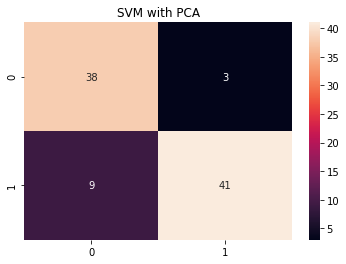

In [39]:
#Confusion matrix heatmap for SVM Classifier after PCA
plt.title("SVM with PCA")
sns.heatmap(confusion_matrix(y_test,y_pred_svmpca),annot=True)
plt.show()

## KNN with PCA

In [40]:
#Creating the KNN CLassifier model after PCA
np.random.seed(42)
knnpca_model=KNeighborsClassifier()
knnpca_model.fit(x_train,y_train)

KNeighborsClassifier()

In [41]:
#Predicting/testing the KNN Classifier model after PCA
y_pred_knnpca=knnpca_model.predict(x_test)

In [42]:
#Accuracy and recall values
print("Accuracy score : %0.3f"%accuracy_score(y_test,y_pred_knnpca))
print("Recall score   : %0.3f"%recall_score(y_test,y_pred_knnpca))
print("F1 score       : %0.3f"%f1_score(y_test,y_pred_knnpca))

Accuracy score : 0.846
Recall score   : 0.820
F1 score       : 0.854


In [43]:
#Adding the accuracy scores to the dictionaries
accuracy_values["KNN with PCA"]=accuracy_score(y_test,y_pred_knnpca)*100
recall_values["KNN with PCA"]=recall_score(y_test,y_pred_knnpca)*100
f1_values["KNN with PCA"]=f1_score(y_test,y_pred_knnpca)*100

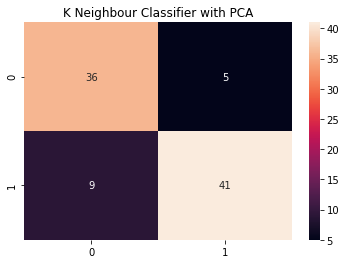

In [44]:
#Confusion matrix heatmap for K Neighbours Classifier after PCA
plt.title("K Neighbour Classifier with PCA")
sns.heatmap(confusion_matrix(y_test,y_pred_knnpca),annot=True)
plt.show()



## Comparing models

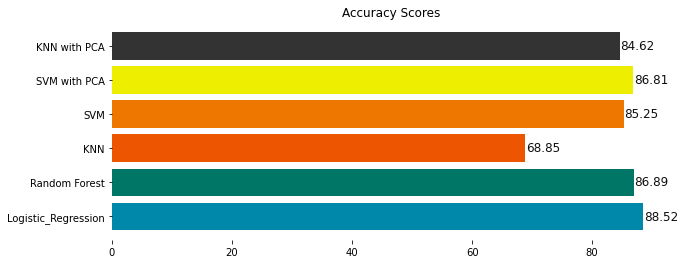

In [45]:
#Plotting Bar graph for Accuracy
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Accuracy Scores")
# Horizontal Bar Plot
ax.barh(list(accuracy_values.keys()),list(accuracy_values.values()),color=["#0088AA","#007766","#EE5500","#EE7700","#EEEE00","#333"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')

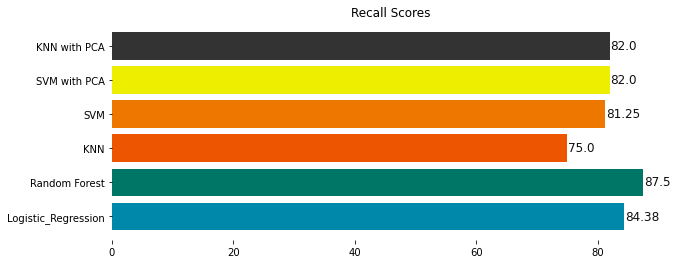

In [46]:
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("Recall Scores")
# Horizontal Bar Plot
ax.barh(list(recall_values.keys()),list(recall_values.values()),color=["#0088AA","#007766","#EE5500","#EE7700","#EEEE00","#333"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')
 

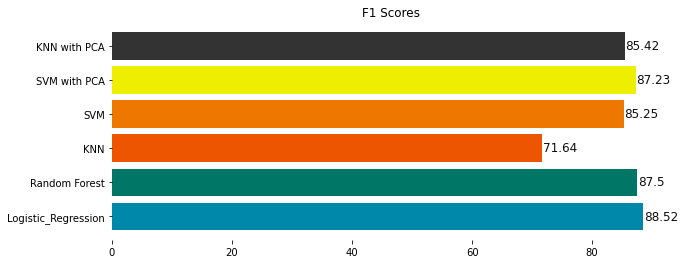

In [47]:
fig, ax = plt.subplots(figsize =(10, 4))
plt.title("F1 Scores")
# Horizontal Bar Plot
ax.barh(list(f1_values.keys()),list(f1_values.values()),color=["#0088AA","#007766","#EE5500","#EE7700","#EEEE00","#333"])
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.1, i.get_y()+0.3,
             str(round((i.get_width()), 2)),
             fontsize = 12,
             color ='#0f0f0f')